Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       1
ShapeFactor4       0
Class              0
dtype: int64
There is missing data in the ShapeFactor3 column so lets fix this

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13533.000000  13533.000000     13533.000000     13533.000000   
mean    53057.388384    855.066479       319.922981       202.378468   
std     29401.235132    214.781993        85.833897        45.064896   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36269.000000    703.180000       253.059398       175.884179   
50%     44581.000000    793.897000       296.441382       192.500481   
75%     61422.000000    977.266000       376.352986       2

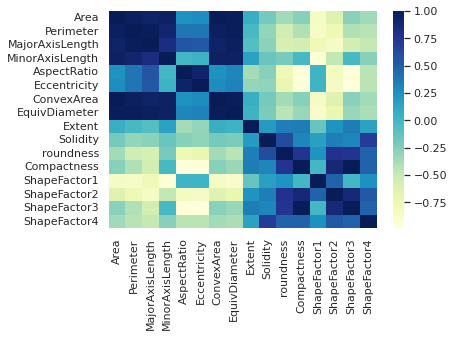

                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966904         0.932615         0.952038   
Perimeter        0.966904   1.000000         0.977558         0.914326   
MajorAxisLength  0.932615   0.977558         1.000000         0.828341   
MinorAxisLength  0.952038   0.914326         0.828341         1.000000   
AspectRatio      0.243660   0.386073         0.550062        -0.005404   
Eccentricity     0.268623   0.391125         0.541075         0.022423   
ConvexArea       0.999940   0.967868         0.933384         0.951777   
EquivDiameter    0.984997   0.991452         0.962267         0.949208   
Extent           0.054675  -0.020630        -0.077350         0.146002   
Solidity        -0.197216  -0.304551        -0.284758        -0.156688   
roundness       -0.358979  -0.548265        -0.595651        -0.213982   
Compactness     -0.269787  -0.407432        -0.567913        -0.018598   
ShapeFactor1    -0.848382  -0.865748  

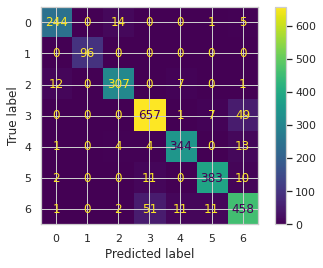

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('/public/bmort/python/beans.csv')
print(df.isnull().sum())
print("There is missing data in the ShapeFactor3 column so lets fix this")

imputed_value = df['ShapeFactor3'].median()
df['ShapeFactor3'].fillna(imputed_value)
df['ShapeFactor3'] = df['ShapeFactor3'].fillna(imputed_value)

print("")

print(df.describe())

print("The maginitudes between the columns are much different, some are very small and some are large.")
print("The range between the columns varies a fair amount as well with some exceptions where they are close")
print("The range of area is large, the range of the convex area is also very large")
print("It is clear to see there are outliers here because there is the max is so far off of the mean.")

sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()
print(df.corr())

print("")

train_x = df[['Area','Perimeter','AspectRatio','Eccentricity','roundness','Compactness']]
train_y = df['Class'].values
print("the decision was taken to drop some features with correlations to area over .9,") 
print("the benefits of this decision should be a significant reduction of the computational complexity")   
print("I chose to use major and minor axis length")  

le = preprocessing.LabelEncoder()
le.fit(df['Class'])
le.transform(df['Class'])
df['le_class'] = le.transform(df['Class'])

train_x = df[['MajorAxisLength','MinorAxisLength','AspectRatio','Extent','Solidity','roundness','ShapeFactor2','ShapeFactor4']]
train_y = df['le_class'].values
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)


rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train);

y_pred = rf.predict(X_test)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


bean = pd.read_csv('/public/bmort/python/beans-unknown.csv')
print(bean)
test_bean = bean[['MajorAxisLength','MinorAxisLength','AspectRatio','Extent','Solidity','roundness','ShapeFactor2','ShapeFactor4']]
bean_pred = rf.predict(test_bean)
print("This is the bean prediction of the sample data")
print(bean_pred)